In [1]:
import pandas as pd
import glob

file_names = glob.glob('./Production Data by Brewery by Month 2022-20240226T230240Z-001/Production Data by Brewery by Month 2022/*.pdf')

import docx
def getText(filename):
    # importing required modules 
    from pypdf import PdfReader 
    
    # creating a pdf reader object 
    reader = PdfReader(filename) 
    fullText = ""
    for page in reader.pages:
        fullText += page.extract_text() + '\n'
    return fullText 

import pandas as pd
contents = {}
for file_name in file_names:
    content = getText(file_name)
    contents[file_name] = content

15
15
14
27
25
15
15
15
15
15
15
15


In [3]:
# read in data that are four columns situated at certain positions
def checkLine(line):
    parts = line.strip('\n').replace(',', '').split()
    # check if have 3 float in each line
    j = 0; fCount = 0
    for i in range(len(parts)):
        try:
            float(parts[i])
            if j == 0:
                j = i
            fCount += 1
        except:
            pass
    try:
        assert(fCount == 3)
        cond = True
    except:
        cond = False
    return cond

def formatLine(line):
    parts = line.strip('\n').replace(',', '').split()
    # check if have 3 float in each line
    j = 0; fCount = 0
    for i in range(len(parts)):
        try:
            float(parts[i])
            if j == 0:
                j = i
            fCount += 1
        except:
            pass
    name = ' '.join(parts[:j])
    return (name, float(parts[j]), float(parts[j+1]), float(parts[j+2]))

import os

dataObject = {}
for file_name in file_names:
    month = os.path.basename(file_name)[:3].upper()
    lines = contents[file_name].split('\n')
    
    filtLines = list(filter(lambda text: checkLine(text), lines))
    data = list(map(lambda text: formatLine(text), filtLines))
    df = pd.DataFrame(data, columns=['Brewery', 'Over 60000', '60000 Under', 'Total'])

    # merge data with same brewery name
    df = df.groupby('Brewery').sum().reset_index()
    dataObject[month] = df

In [4]:
monthNumberObject = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6, "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}

# aggregate data from different breweries into one dataframe
dfAll = pd.DataFrame(columns=['Brewery'])
for month in dataObject:
    df = dataObject[month]
    dfSub = df[['Brewery', 'Total']].rename(columns={'Total': monthNumberObject[month]})
    dfAll = pd.merge(dfAll, dfSub, on='Brewery', how='outer')

In [5]:
dfAll

,Brewery,4,8,12,2,1,7,6,3,5,11,10,9
0,21ST AMENDMENT,174.01,49.34,56.05,39.60,-12.17,-14.63,95.87,-27.36,-14.28,-16.34,88.22,-37.63
1,5TH LINE BREWING CO.,6.78,5.96,7.13,4.78,4.70,10.18,14.38,7.79,5.78,7.12,9.21,7.05
2,ABITA BREWING COMPANY LLC,14.48,23.96,14.52,NaN,33.75,NaN,18.47,21.41,8.92,2.90,25.55,11.98
3,ABNORMAL BEER CO,6.38,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.90,NaN
4,ACORN BREWING,19.85,38.14,21.58,NaN,17.56,NaN,21.58,35.22,19.85,19.72,19.68,19.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,STICK CITY BREWING COMPANY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.90,NaN
889,GOLD BUCKLE BREWERY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.87
890,LEIKAM BREWING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.81
891,LOST GROVE BREWING LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.38


In [6]:
# sort breweries by total production
sortedDfAll = dfAll.iloc[dfAll[[1,2,3,4,5,6,7,8,9,10,11,12]].sum(axis=1).sort_values(ascending=False).index].reset_index(drop=True)
# drop row total production
sortedDfAll = sortedDfAll[sortedDfAll['Brewery'].apply(lambda x: "Total" not in x)].reset_index(drop=True)


In [7]:
sortedDfAll.to_csv('brewery_monthly_production_2022.csv', index=False, header=True)

In [8]:
sortedDfAll.head()

,Brewery,4,8,12,2,1,7,6,3,5,11,10,9
0,ANHEUSER-BUSCH,84711.58,121777.66,69647.65,86605.20,82718.39,109179.90,92468.25,98521.98,99589.33,70992.27,82934.26,92403.54
1,MILLERCOORS,81442.02,92874.04,52628.00,62743.02,72612.34,84828.92,86396.11,77260.51,93336.98,73882.35,64324.32,88021.50
2,MARK ANTHONY BRANDS,29996.00,24572.94,9499.35,24801.43,22059.64,23886.75,35631.05,39612.35,42147.28,19960.46,33271.36,31030.51
3,PABST BREWING,9765.34,17224.35,13345.76,12214.09,14641.35,18157.79,19194.70,12939.65,31595.86,12107.57,15312.95,18875.10
4,GEORGETOWN BREWING CO.,8672.18,10193.51,7380.14,6503.01,6409.97,8722.62,9571.99,8538.23,8855.93,9315.17,8985.20,9227.20


In [9]:
# Create a new column 'total' that is the sum of all month columns
sortedDfAll['total'] = sortedDfAll.iloc[:, 1:].sum(axis=1)

# Group by 'Brewery', and find the row with the largest 'total' for each 'Brewery'
top_rows = sortedDfAll.loc[sortedDfAll.groupby("Brewery")["total"].idxmax()].sort_values(by='total', ascending=False).reset_index(drop=True)

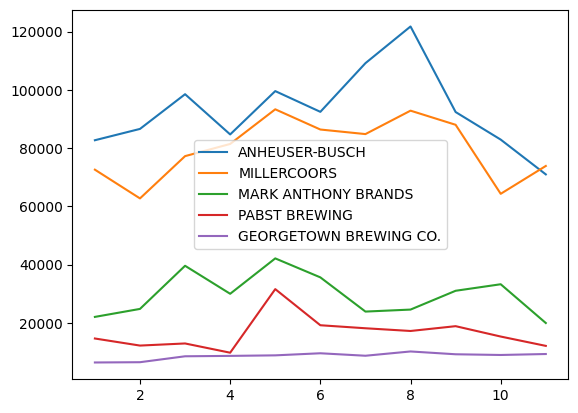

In [10]:
import matplotlib.pyplot as plt

# Assuming top_rows is a DataFrame where each row represents a brewery and columns 1-11 are the months
for index, row in top_rows.head(5).iterrows():
    plt.plot(row[[1,2,3,4,5,6,7,8,9,10,11]], label=top_rows.iloc[index].Brewery)

plt.legend()
plt.show()

In [29]:
# steps in analysis
# 1. see the correlation of production numbers between breweries that have similar production numbers
# 2. price elasticity model between production numbers and price
# 3. location data to see whether breweries in the same area have similar production numbers
# 4. see whether breweries that have similar production numbers have similar product lines